In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
import pandas as pd
import oscovida as ov

In [3]:
data = ov.fetch_data_germany()

Please be patient - downloading data from https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data ...
Completed downloading 1273755 rows in 25.9 seconds.


In [4]:
data.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
date,,,,,,,,,,,,,,,,,,
2020-11-30,1,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020/11/30 00:00:00,1002,"20.02.2021, 00:00 Uhr",0,-9,2020/11/26 00:00:00,0,1,1,Nicht übermittelt
2020-11-30,2,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020/11/30 00:00:00,1002,"20.02.2021, 00:00 Uhr",0,-9,2020/11/27 00:00:00,0,1,1,Nicht übermittelt
2020-12-01,3,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020/12/01 00:00:00,1002,"20.02.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00,0,1,1,Nicht übermittelt
2020-12-01,4,1,Schleswig-Holstein,SK Kiel,A15-A34,M,2,0,2020/12/01 00:00:00,1002,"20.02.2021, 00:00 Uhr",0,-9,2020/11/21 00:00:00,0,2,1,Nicht übermittelt
2020-12-01,5,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020/12/01 00:00:00,1002,"20.02.2021, 00:00 Uhr",0,-9,2020/11/28 00:00:00,0,1,1,Nicht übermittelt


<AxesSubplot:xlabel='date'>

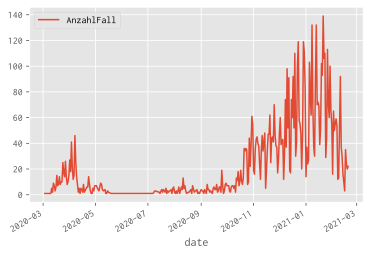

In [5]:
df4 = data.groupby(["Landkreis", "date"]).agg({'AnzahlFall': 'sum'})
df4.loc["LK Pinneberg"].plot()

In [6]:
total_infections = df4.unstack().sum().sum()
total_infections

2378494.0

In [7]:
# df4_b = df4.unstack(level=0).resample("1D").asfreq().fillna(0)
# assert df4_b.sum().sum() == total_infections

In [8]:
# df4.loc["SK Emden"].resample("1D").asfreq().fillna(0)

In [9]:
# df4.unstack() #.T.resample("1D").asfreq().fillna(0)

In [10]:
# df4.unstack(level=0)

In [9]:
df4

AnzahlFall
Landkreis          date                  
LK Ahrweiler       2020-03-12           6
                   2020-03-13           3
                   2020-03-14           1
                   2020-03-16           4
                   2020-03-17           6
...                                   ...
StadtRegion Aachen 2021-02-15           4
                   2021-02-16          49
                   2021-02-17          44
                   2021-02-18          37
                   2021-02-19          28

[101612 rows x 1 columns]

In [15]:
df4_resampled = df4.unstack(level=0).resample("1D").asfreq().stack(level=0).fillna(0)
assert df4_resampled.sum().sum() == total_infections
df4_resampled2 = df4_resampled.copy()

In [16]:
tmp = df4_resampled.T.stack().stack()

In [17]:
tmp.index

MultiIndex([(      'LK Ahrweiler', 'AnzahlFall', '2020-01-02'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-07'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-09'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-12'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-14'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-15'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-19'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-23'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-25'),
            (      'LK Ahrweiler', 'AnzahlFall', '2020-01-28'),
            ...
            ('StadtRegion Aachen', 'AnzahlFall', '2021-02-10'),
            ('StadtRegion Aachen', 'AnzahlFall', '2021-02-11'),
            ('StadtRegion Aachen', 'AnzahlFall', '2021-02-12'),
            ('StadtRegion Aachen', 'AnzahlFall', '2021-02-13'),
            ('StadtRegion Aachen', 'AnzahlFall', '2021-02-14'),
            ('StadtRegio

In [18]:
tmp.index = tmp.index.droplevel(level=1)

In [19]:
tmp.unstack().stack()

Landkreis           date      
LK Ahrweiler        2020-01-02     0.0
                    2020-01-07     0.0
                    2020-01-09     0.0
                    2020-01-12     0.0
                    2020-01-14     0.0
                                  ... 
StadtRegion Aachen  2021-02-15     4.0
                    2021-02-16    49.0
                    2021-02-17    44.0
                    2021-02-18    37.0
                    2021-02-19    28.0
Length: 159032, dtype: float64

In [20]:
df4_resampled2.index = df4_resampled.index.droplevel(level=1)

In [21]:
df4_resampled2.stack()

date        Landkreis           
2020-01-02  LK Ahrweiler             0.0
            LK Aichach-Friedberg     0.0
            LK Alb-Donau-Kreis       0.0
            LK Altenburger Land      0.0
            LK Altenkirchen          0.0
                                    ... 
2021-02-19  SK Worms                10.0
            SK Wuppertal            44.0
            SK Würzburg             11.0
            SK Zweibrücken           1.0
            StadtRegion Aachen      28.0
Length: 159032, dtype: float64

In [22]:
df5 = tmp

In [23]:
pd.set_option("display.max_rows",1000)
df4.loc["SK Emden"]

,AnzahlFall
date,
2020-03-11,3
2020-03-16,1
2020-03-17,3
2020-03-31,1
2020-04-03,1
2020-04-04,2
2020-04-06,1
2020-04-08,2
2020-04-15,1


In [24]:
df5.loc["SK Emden"]

date
2020-01-02     0.0
2020-01-07     0.0
2020-01-09     0.0
2020-01-12     0.0
2020-01-14     0.0
2020-01-15     0.0
2020-01-19     0.0
2020-01-23     0.0
2020-01-25     0.0
2020-01-28     0.0
2020-01-29     0.0
2020-01-30     0.0
2020-01-31     0.0
2020-02-03     0.0
2020-02-04     0.0
2020-02-06     0.0
2020-02-07     0.0
2020-02-10     0.0
2020-02-11     0.0
2020-02-12     0.0
2020-02-16     0.0
2020-02-17     0.0
2020-02-18     0.0
2020-02-20     0.0
2020-02-24     0.0
2020-02-25     0.0
2020-02-26     0.0
2020-02-27     0.0
2020-02-28     0.0
2020-02-29     0.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     0.0
2020-03-04     0.0
2020-03-05     0.0
2020-03-06     0.0
2020-03-07     0.0
2020-03-08     0.0
2020-03-09     0.0
2020-03-10     0.0
2020-03-11     3.0
2020-03-12     0.0
2020-03-13     0.0
2020-03-14     0.0
2020-03-15     0.0
2020-03-16     1.0
2020-03-17     3.0
2020-03-18     0.0
2020-03-19     0.0
2020-03-20     0.0
2020-03-21     0.0
2020-03-22     0.0
2020-03

In [25]:
#df5 = df4.groupby([pd.Grouper(level='Landkreis'), 
#                   pd.Grouper(level='date', freq='7D')]
#                  ).sum()

In [26]:
df5

Landkreis           date      
LK Ahrweiler        2020-01-02     0.0
                    2020-01-07     0.0
                    2020-01-09     0.0
                    2020-01-12     0.0
                    2020-01-14     0.0
                                  ... 
StadtRegion Aachen  2021-02-15     4.0
                    2021-02-16    49.0
                    2021-02-17    44.0
                    2021-02-18    37.0
                    2021-02-19    28.0
Length: 159032, dtype: float64

<AxesSubplot:xlabel='date'>

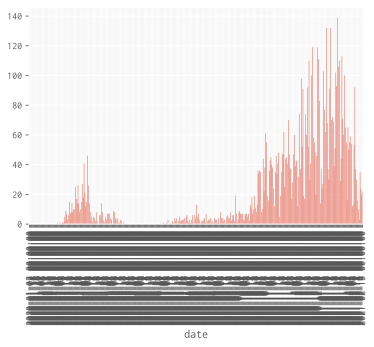

In [27]:
df5.loc["LK Pinneberg"].plot(kind='bar')

<AxesSubplot:>

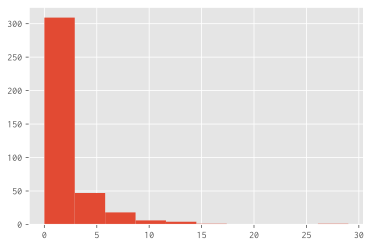

In [30]:
df5.loc["SK Emden"].hist()

<AxesSubplot:>

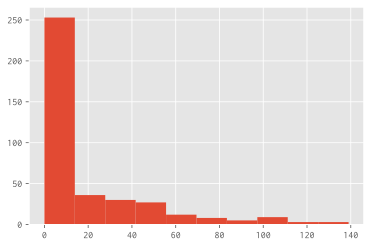

In [31]:
df5.loc["LK Pinneberg"].hist()

In [32]:
df5.loc["LK Pinneberg"]

date
2020-01-02      0.0
2020-01-07      0.0
2020-01-09      0.0
2020-01-12      0.0
2020-01-14      0.0
2020-01-15      0.0
2020-01-19      0.0
2020-01-23      0.0
2020-01-25      0.0
2020-01-28      0.0
2020-01-29      0.0
2020-01-30      0.0
2020-01-31      0.0
2020-02-03      0.0
2020-02-04      0.0
2020-02-06      0.0
2020-02-07      0.0
2020-02-10      0.0
2020-02-11      0.0
2020-02-12      0.0
2020-02-16      0.0
2020-02-17      0.0
2020-02-18      0.0
2020-02-20      0.0
2020-02-24      0.0
2020-02-25      0.0
2020-02-26      0.0
2020-02-27      0.0
2020-02-28      0.0
2020-02-29      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      1.0
2020-03-04      0.0
2020-03-05      0.0
2020-03-06      1.0
2020-03-07      0.0
2020-03-08      0.0
2020-03-09      1.0
2020-03-10      1.0
2020-03-11      5.0
2020-03-12      2.0
2020-03-13      9.0
2020-03-14      7.0
2020-03-15      3.0
2020-03-16      6.0
2020-03-17     15.0
2020-03-18      7.0
2020-03-19      8.0
2020-03-20     

In [33]:
df5.sum().sum()

2378494.0

<AxesSubplot:xlabel='date'>

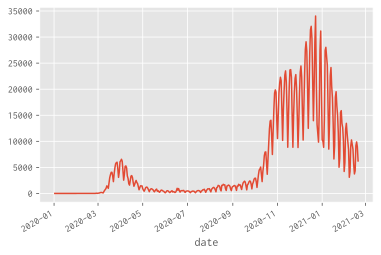

In [34]:
df6a = df5.unstack().T
df6a.sum(axis=1).plot()

In [35]:
df6 = df6a.resample("7D").sum()

In [36]:
df6a.sum().sum()

2378494.0

In [37]:
# compute bins for histograms
import numpy as np

data_max_value = int(df6.max().max())
bins_max_value = 100
bins_width = 5
nbins = bins_max_value // bins_width + 1
print(f"Using {nbins} bins")
# equidistant bins
bins0 = np.linspace(0, nbins * bins_width, nbins + 1)
# add a bin for zero to 1 at the beginning
bins1 = [0] + list(bins0)
bins1[1] = 1
assert bins1[0] == 0
assert bins1[1] == 1
assert bins1[2] == bins_width


bins = bins1

# for later: add large boundary at right
assert bins[-1] > bins_max_value
# needed for histogram command
bins_with_right_edge = list(bins)+[bins[-1] + bins_width]
# bins_with_right_edge = list(bins)+[bins_max_value + 1]
bins_with_right_edge[0:5]

Using 21 bins


[0, 1, 5.0, 10.0, 15.0]

In [38]:
# compute week of the year to place histogram
week_of_the_year = [x.week for x in df6.index[:]]
week_of_the_year_date = [x.strftime('%Y-%m-%d') for x in df6.index[:]]

In [39]:
df6.index

DatetimeIndex(['2020-01-02', '2020-01-09', '2020-01-16', '2020-01-23',
               '2020-01-30', '2020-02-06', '2020-02-13', '2020-02-20',
               '2020-02-27', '2020-03-05', '2020-03-12', '2020-03-19',
               '2020-03-26', '2020-04-02', '2020-04-09', '2020-04-16',
               '2020-04-23', '2020-04-30', '2020-05-07', '2020-05-14',
               '2020-05-21', '2020-05-28', '2020-06-04', '2020-06-11',
               '2020-06-18', '2020-06-25', '2020-07-02', '2020-07-09',
               '2020-07-16', '2020-07-23', '2020-07-30', '2020-08-06',
               '2020-08-13', '2020-08-20', '2020-08-27', '2020-09-03',
               '2020-09-10', '2020-09-17', '2020-09-24', '2020-10-01',
               '2020-10-08', '2020-10-15', '2020-10-22', '2020-10-29',
               '2020-11-05', '2020-11-12', '2020-11-19', '2020-11-26',
               '2020-12-03', '2020-12-10', '2020-12-17', '2020-12-24',
               '2020-12-31', '2021-01-07', '2021-01-14', '2021-01-21',
      

In [40]:
list(zip(week_of_the_year, week_of_the_year_date))

[(1, '2020-01-02'),
 (2, '2020-01-09'),
 (3, '2020-01-16'),
 (4, '2020-01-23'),
 (5, '2020-01-30'),
 (6, '2020-02-06'),
 (7, '2020-02-13'),
 (8, '2020-02-20'),
 (9, '2020-02-27'),
 (10, '2020-03-05'),
 (11, '2020-03-12'),
 (12, '2020-03-19'),
 (13, '2020-03-26'),
 (14, '2020-04-02'),
 (15, '2020-04-09'),
 (16, '2020-04-16'),
 (17, '2020-04-23'),
 (18, '2020-04-30'),
 (19, '2020-05-07'),
 (20, '2020-05-14'),
 (21, '2020-05-21'),
 (22, '2020-05-28'),
 (23, '2020-06-04'),
 (24, '2020-06-11'),
 (25, '2020-06-18'),
 (26, '2020-06-25'),
 (27, '2020-07-02'),
 (28, '2020-07-09'),
 (29, '2020-07-16'),
 (30, '2020-07-23'),
 (31, '2020-07-30'),
 (32, '2020-08-06'),
 (33, '2020-08-13'),
 (34, '2020-08-20'),
 (35, '2020-08-27'),
 (36, '2020-09-03'),
 (37, '2020-09-10'),
 (38, '2020-09-17'),
 (39, '2020-09-24'),
 (40, '2020-10-01'),
 (41, '2020-10-08'),
 (42, '2020-10-15'),
 (43, '2020-10-22'),
 (44, '2020-10-29'),
 (45, '2020-11-05'),
 (46, '2020-11-12'),
 (47, '2020-11-19'),
 (48, '2020-11-26'),
 

In [41]:
# drop last week??

In [42]:
# suitable colours
def my_colours(n, alpha=0.1):
    import matplotlib
    #colours = matplotlib.pyplot.cm.rainbow(np.linspace(0, 1, n), alpha=alpha)
    #colours = matplotlib.pyplot.cm.RdYlGn(np.linspace(0, 1, n), alpha=alpha)
    colours = list(reversed(matplotlib.pyplot.cm.autumn(np.linspace(0, 1, n), alpha=alpha)))
    # first colour green
    colours[0] = [0, 1, 0, 1.0 + 0*alpha]
 
    return colours

print(my_colours(50))

[[0, 1, 0, 1.0], array([1.        , 0.98039216, 0.        , 0.1       ]), array([1.        , 0.96078431, 0.        , 0.1       ]), array([1.        , 0.94117647, 0.        , 0.1       ]), array([1.        , 0.92156863, 0.        , 0.1       ]), array([1.        , 0.89803922, 0.        , 0.1       ]), array([1.        , 0.87843137, 0.        , 0.1       ]), array([1.        , 0.85882353, 0.        , 0.1       ]), array([1.        , 0.83921569, 0.        , 0.1       ]), array([1.        , 0.81568627, 0.        , 0.1       ]), array([1.        , 0.79607843, 0.        , 0.1       ]), array([1.        , 0.77647059, 0.        , 0.1       ]), array([1.        , 0.75686275, 0.        , 0.1       ]), array([1.       , 0.7372549, 0.       , 0.1      ]), array([1.        , 0.71372549, 0.        , 0.1       ]), array([1.        , 0.69411765, 0.        , 0.1       ]), array([1.       , 0.6745098, 0.       , 0.1      ]), array([1.        , 0.65490196, 0.        , 0.1       ]), array([1.        , 0.6

found 60 data sets
21 20 0 142.0
1-week zero incidences: 88
22 21 1 142.0
1-week zero incidences: 107
23 22 2 142.0
1-week zero incidences: 121
24 23 3 564.0
1-week zero incidences: 131
25 24 4 780.0
1-week zero incidences: 128
26 25 5 338.0
1-week zero incidences: 126
27 26 6 138.0
1-week zero incidences: 111
28 27 7 103.0
1-week zero incidences: 94
29 28 8 114.0
1-week zero incidences: 87
30 29 9 187.0
1-week zero incidences: 67
31 30 10 242.0
1-week zero incidences: 59
32 31 11 253.0
1-week zero incidences: 29
33 32 12 420.0
1-week zero incidences: 15
34 33 13 504.0
1-week zero incidences: 14
35 34 14 476.0
1-week zero incidences: 16
36 35 15 669.0
1-week zero incidences: 23
37 36 16 701.0
1-week zero incidences: 6
38 37 17 702.0
1-week zero incidences: 8
39 38 18 561.0
1-week zero incidences: 5
40 39 19 687.0
1-week zero incidences: 6
41 40 20 888.0
1-week zero incidences: 0
42 41 21 1405.0
1-week zero incidences: 0
43 42 22 2488.0
1-week zero incidences: 0
44 43 23 2950.0
1-week z

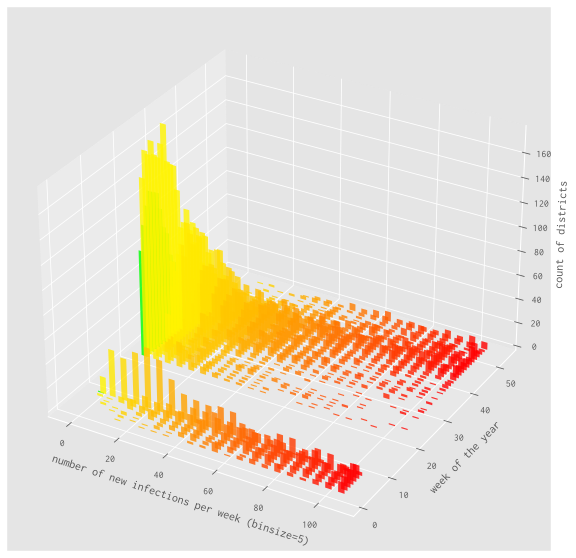

In [44]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
n = len(week_of_the_year)
print(f"found {n} data sets")
last_n_weeks = 40

# gather results in matrix
m_i = 0
m = np.zeros(shape=(last_n_weeks, len(bins)))

for c, z, i in zip(my_colours(last_n_weeks), week_of_the_year[-last_n_weeks:], range(n-last_n_weeks, n)):
    print(z, i, m_i, df6.iloc[i, :].max())
    xs = bins
    count, bins_ = np.histogram(df6.iloc[i,:], bins=bins_with_right_edge)
    m[m_i, :] = count[:]
    m_i += 1
    print(f"1-week zero incidences: {count[0]}")
    ys = count

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs = my_colours(len(xs))
    # cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8, width=0.5*bins_width)

ax.set_xlabel(f'number of new infections per week (binsize={bins_width})')
ax.set_zlabel('count of districts')
ax.set_ylabel('week of the year')

plt.show()

In [45]:
!pwd

/Users/fangohr/git/oscovida/tools/pelican/content/ipynb


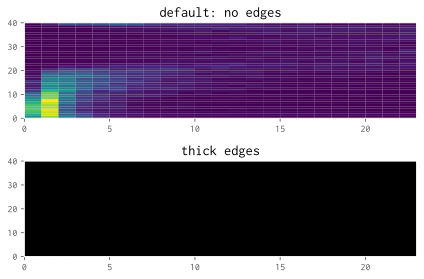

In [46]:
fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(m)
ax0.set_title('default: no edges')
# plt.colorbar()

c = ax1.pcolor(m, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

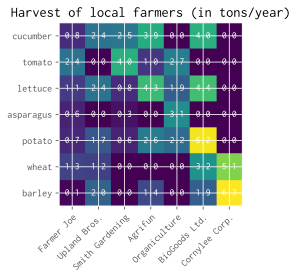

In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest,)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()
